# Hotel Booking : Exploratory Data Analysis

This notebook explores a hotel booking dataset to understand demand patterns, guest behavior, pricing, and drivers of cancellations.I have framed the EDA around business questions that a hotel revenue or operations team would require.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


## 1. Data Overview & Sanity Checks


In [ ]:
# Load data 
df = pd.read_csv("hotel_bookings.csv")
df.shape


(119390, 32)

In [4]:
# good old df.head to check the first 5 rows
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Summary statistics for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0


In [10]:
#Check for  Missing values 
df.isna().sum().sort_values(ascending=False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [7]:
#define a list for columns with categories and not continuous variables
categorical_cols = [
    "hotel", "is_canceled", "arrival_date_year", "arrival_date_month",
    "market_segment", "distribution_channel", "customer_type",
    "deposit_type", "reserved_room_type", "assigned_room_type"
]

for col in categorical_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False).head(10))



=== hotel ===
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

=== is_canceled ===
is_canceled
no     75166
yes    44224
Name: count, dtype: int64

=== arrival_date_year ===
arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

=== arrival_date_month ===
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
Name: count, dtype: int64

=== market_segment ===
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

=== distribution_channel ===
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

=== customer_type ===
cust

## 2. Feature Engineering for Business Data Analysis

Creating following helper columns to make the analysis more intuitive:

- `total_nights`: total nights stayed (week + weekend)
- `total_guests`: adults + children + babies
- `arrival_date`: proper datetime from year, month, and day
- `is_canceled_flag`: 0/1 numeric version of `is_canceled`
- `revenue`: rough revenue proxy = ADR × total_nights
- `stay_type`: "Couple", "Family", or "Solo" based on guest composition


In [8]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["total_guests"] = df[["adults", "children", "babies"]].fillna(0).sum(axis=1)

df["arrival_date"] = pd.to_datetime(
    df["arrival_date_year"].astype(str) + "-" +
    df["arrival_date_month"] + "-" +
    df["arrival_date_day_of_month"].astype(str),
    errors="coerce"
)

# Convert yes/no to 0/1
df["is_canceled_flag"] = df["is_canceled"].str.lower().eq("yes").astype(int)

df["revenue"] = df["adr"] * df["total_nights"]

df["stay_type"] = np.where(
    df[["children", "babies"]].fillna(0).sum(axis=1) > 0, "Family",
    np.where(df["adults"] >= 2, "Couple", "Solo")
)

df[["hotel", "arrival_date", "total_nights", "total_guests", "is_canceled_flag", "revenue", "stay_type"]].head()


,hotel,arrival_date,total_nights,total_guests,is_canceled_flag,revenue,stay_type
0,Resort Hotel,2015-07-01,0,2.0,0,0.0,Couple
1,Resort Hotel,2015-07-01,0,2.0,0,0.0,Couple
2,Resort Hotel,2015-07-01,1,1.0,0,75.0,Solo
3,Resort Hotel,2015-07-01,1,1.0,0,75.0,Solo
4,Resort Hotel,2015-07-01,2,2.0,0,196.0,Couple


In [9]:
overall_cancel_rate = df["is_canceled_flag"].mean()
cancel_by_hotel = df.groupby("hotel")["is_canceled_flag"].mean()

print(f"Overall cancellation rate: {overall_cancel_rate:.2%}")
cancel_by_hotel.to_frame("cancel_rate").applymap(lambda x: f"{x:.2%}")


Overall cancellation rate: 37.04%


C:\Users\adhee\AppData\Local\Temp\ipykernel_20260\3949320241.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cancel_by_hotel.to_frame("cancel_rate").applymap(lambda x: f"{x:.2%}")


,cancel_rate
hotel,
City Hotel,41.73%
Resort Hotel,27.76%


## 3. Demand & Seasonality

**Business Question 1:** When is hotel demand highest, and how does it differ between city and resort hotels?


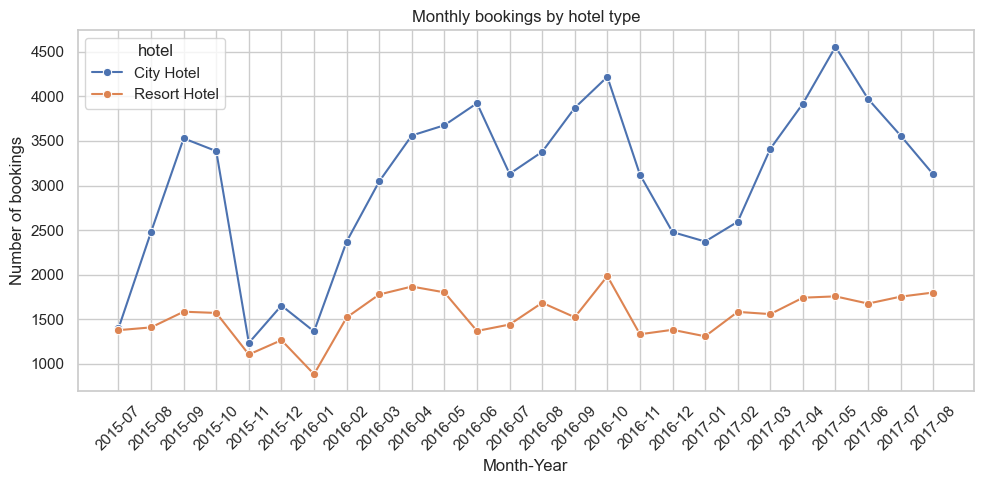

In [10]:
df_month = df.dropna(subset=["arrival_date"]).copy()
df_month["month_year"] = df_month["arrival_date"].dt.to_period("M")

monthly_bookings = (
    df_month.groupby(["month_year", "hotel"])
    .size()
    .reset_index(name="bookings")
)

# FIX HERE
monthly_bookings["month_year"] = monthly_bookings["month_year"].astype(str)

plt.figure()
sns.lineplot(
    data=monthly_bookings,
    x="month_year", y="bookings", hue="hotel", marker="o"
)
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Number of bookings")
plt.title("Monthly bookings by hotel type")
plt.tight_layout()
plt.show()


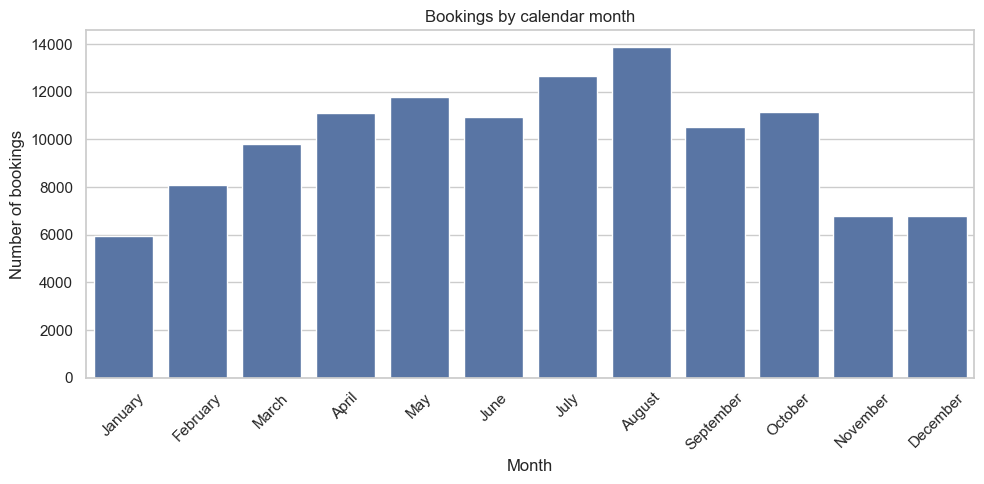

,arrival_date_month,bookings
0,January,5929
1,February,8068
2,March,9794
3,April,11089
4,May,11791
5,June,10939
6,July,12661
7,August,13877
8,September,10508
9,October,11160


In [11]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

bookings_by_month = (
    df.groupby("arrival_date_month")
      .size()
      .reindex(month_order)
      .reset_index(name="bookings")
)

plt.figure()
sns.barplot(data=bookings_by_month, x="arrival_date_month", y="bookings")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of bookings")
plt.title("Bookings by calendar month")
plt.tight_layout()
plt.show()

bookings_by_month


**Insights (Demand & Seasonality)**  

- Demand peaks around the summer months (especially July–August), with materially lower demand in winter months such as January and November.  
- City hotels handle more overall volume than resort hotels, while resort hotels show a stronger seasonal pattern consistent with vacation travel.  
- These patterns suggest focusing staff, marketing, and inventory planning around peak months and using promotions to improve off-season occupancy.


## 4. Stay Length & Guest Profiles

**Business Question 2:** How long do guests typically stay, and does this differ by hotel type?

**Business Question 3:** What does the guest profile look like (couples vs families vs solo), and how does it vary by hotel?


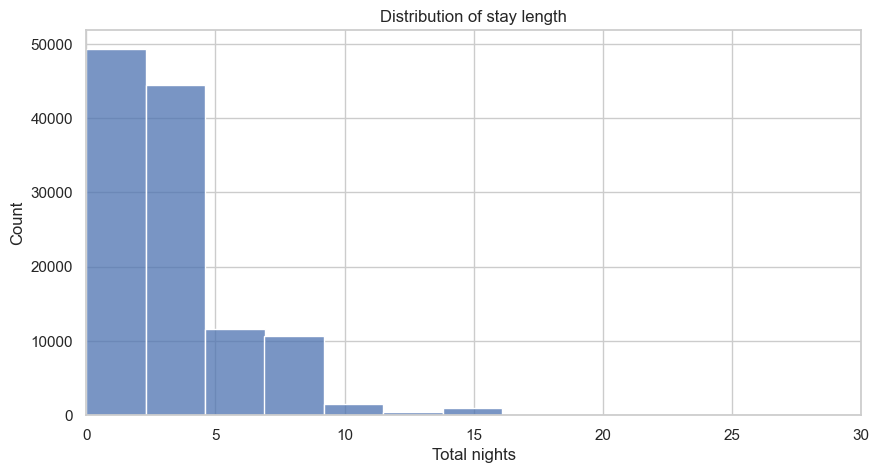

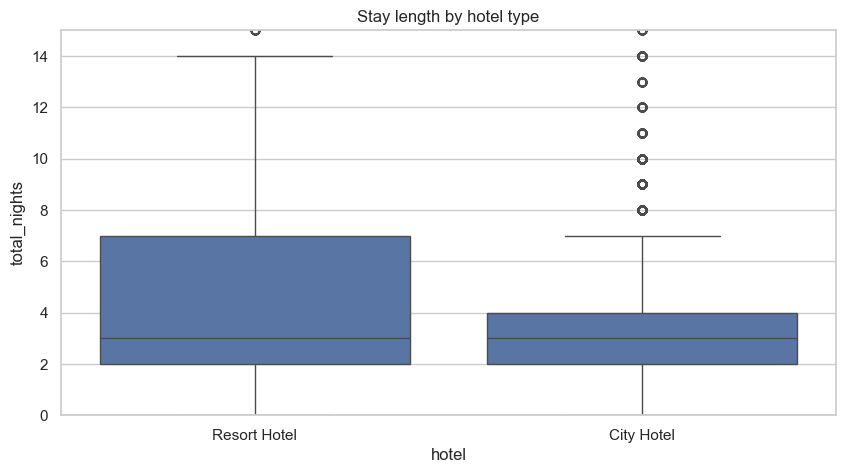

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,2.978142,1.862937,0.0,2.0,3.0,4.0,57.0
Resort Hotel,40060.0,4.318547,3.380273,0.0,2.0,3.0,7.0,69.0


In [12]:
plt.figure()
sns.histplot(df["total_nights"], bins=30, kde=False)
plt.xlim(0, 30)
plt.xlabel("Total nights")
plt.title("Distribution of stay length")
plt.show()

plt.figure()
sns.boxplot(data=df, x="hotel", y="total_nights")
plt.ylim(0, 15)
plt.title("Stay length by hotel type")
plt.show()

df.groupby("hotel")["total_nights"].describe()


stay_type
Couple    87301
Solo      22757
Family     9332
Name: count, dtype: int64

,stay_type,avg_nights,avg_adr,cancel_rate
0,Couple,3.565709,101.641222,0.393867
1,Family,3.935276,154.434700,0.349228
2,Solo,2.691172,80.988385,0.289142


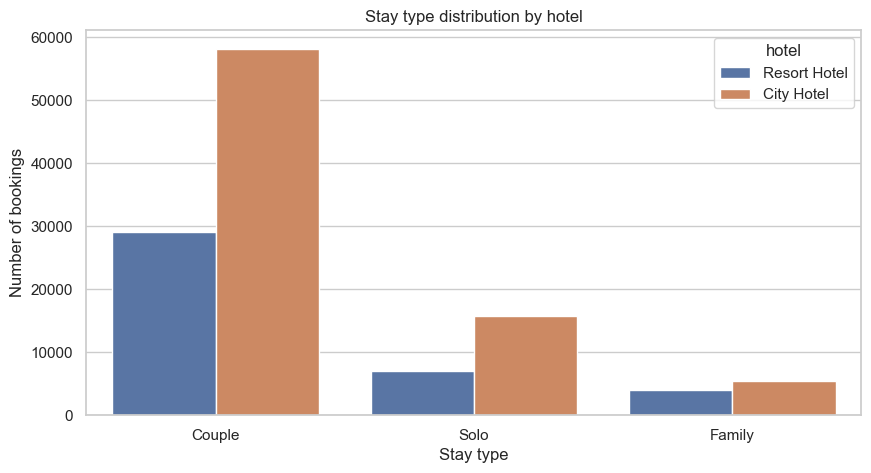

In [13]:
stay_counts = df["stay_type"].value_counts()

stay_metrics = df.groupby("stay_type").agg(
    avg_nights=("total_nights", "mean"),
    avg_adr=("adr", "mean"),
    cancel_rate=("is_canceled_flag", "mean")
).reset_index()

display(stay_counts)
display(stay_metrics)

plt.figure()
sns.countplot(data=df, x="stay_type", hue="hotel")
plt.title("Stay type distribution by hotel")
plt.xlabel("Stay type")
plt.ylabel("Number of bookings")
plt.show()


**Insights (Stay Length & Guest Profiles)**  

- Most stays are relatively short (median around 3 nights), with a long tail of extended stays.  
- Resort hotels tend to have slightly longer stays than city hotels, consistent with leisure and vacation trips.  
- Couples make up the majority of bookings, followed by solo guests and then families. Families typically stay longer and pay higher ADR on average, making them a high-value segment.


## 5. Customer Segments & Booking Channels

**Business Question 4:** Which customer segments (market_segment, distribution_channel) drive most bookings and revenue?

**Business Question 5:** Which countries bring the most guests, and are they high-value?


,market_segment,bookings,avg_adr,total_revenue
0,Online TA,56477,117.197063,23942047.53
1,Offline TA/TO,24219,87.354783,8151912.73
2,Groups,19811,79.479472,4669636.74
3,Direct,12606,115.445175,5093028.39
4,Corporate,5295,69.358952,774295.26
5,Complementary,743,2.886366,5082.52
6,Aviation,237,100.142110,87446.36
7,Undefined,2,15.000000,48.00


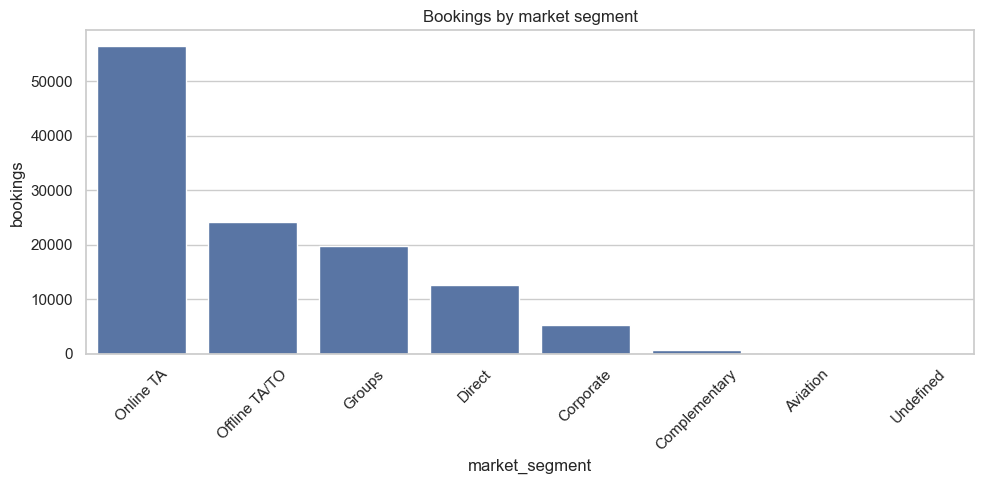

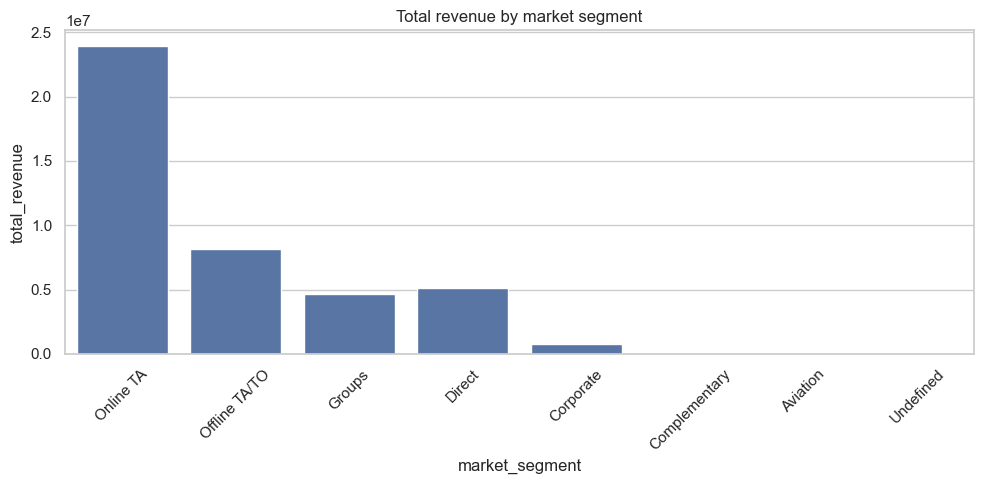

In [14]:
seg = (
    df.groupby("market_segment")
      .agg(
          bookings=("hotel", "size"),
          avg_adr=("adr", "mean"),
          total_revenue=("revenue", "sum")
      )
      .sort_values("bookings", ascending=False)
      .reset_index()
)

display(seg)

plt.figure()
sns.barplot(data=seg, x="market_segment", y="bookings")
plt.xticks(rotation=45)
plt.title("Bookings by market segment")
plt.tight_layout()
plt.show()

plt.figure()
sns.barplot(data=seg, x="market_segment", y="total_revenue")
plt.xticks(rotation=45)
plt.title("Total revenue by market segment")
plt.tight_layout()
plt.show()


,distribution_channel,bookings,avg_adr,cancel_rate
0,TA/TO,97870,103.292866,0.410259
1,Direct,14645,106.654983,0.174599
2,Corporate,6677,69.325204,0.220758
3,GDS,193,120.554301,0.191710
4,Undefined,5,46.240000,0.800000


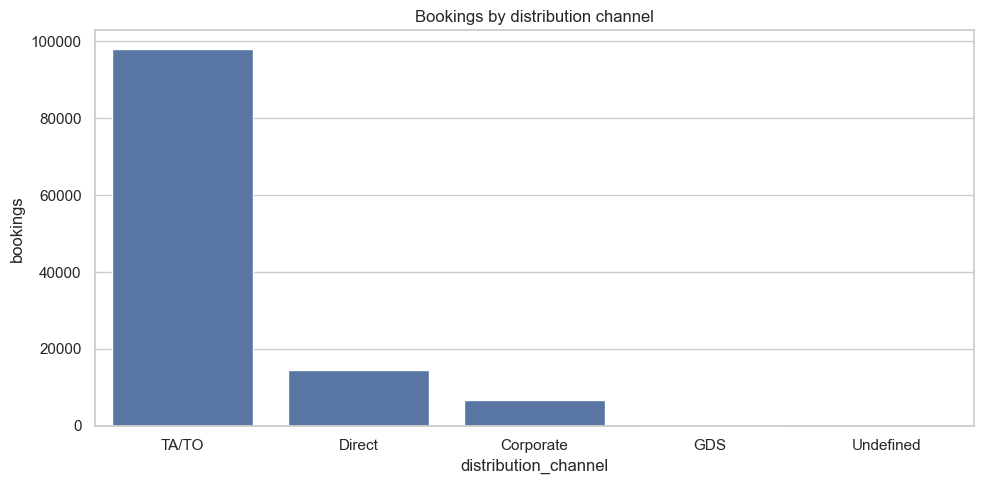

In [15]:
chan = (
    df.groupby("distribution_channel")
      .agg(
          bookings=("hotel", "size"),
          avg_adr=("adr", "mean"),
          cancel_rate=("is_canceled_flag", "mean")
      )
      .sort_values("bookings", ascending=False)
      .reset_index()
)

display(chan)

plt.figure()
sns.barplot(data=chan, x="distribution_channel", y="bookings")
plt.title("Bookings by distribution channel")
plt.tight_layout()
plt.show()


,country,bookings,avg_adr,total_revenue
0,PRT,48590,92.041483,14129138.79
1,GBR,12129,96.022058,5284467.53
2,FRA,10415,109.617276,4026513.04
3,ESP,8568,116.995463,3304436.86
4,DEU,7287,104.396756,2624462.75
5,ITA,3766,113.948208,1416871.32
6,IRL,3375,98.192172,1652099.97
7,BEL,2342,113.847784,979151.86
8,BRA,2224,111.005337,861397.12
9,NLD,2104,108.085480,800036.95


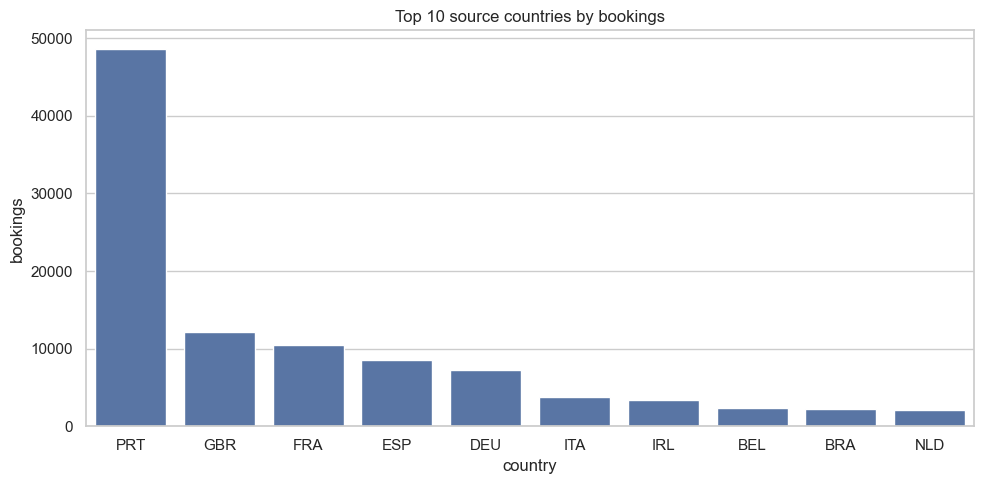

In [16]:
country = (
    df.groupby("country")
      .agg(
          bookings=("hotel", "size"),
          avg_adr=("adr", "mean"),
          total_revenue=("revenue", "sum")
      )
      .sort_values("bookings", ascending=False)
      .head(10)
      .reset_index()
)

display(country)

plt.figure()
sns.barplot(data=country, x="country", y="bookings")
plt.title("Top 10 source countries by bookings")
plt.tight_layout()
plt.show()


**Insights (Segments, Channels & Countries)**  

- Online travel agencies are the dominant market segment by both bookings and revenue, followed by offline agents/tour operators and direct bookings.  
- The TA/TO distribution channel handles the bulk of reservations but also shows relatively high cancellation rates compared to direct channels.  
- Direct bookings tend to have lower cancellation rates and competitive ADR, making them strategically important despite lower volume.  
- A small group of countries contributes a large share of demand and revenue, suggesting clear priorities for regional marketing and partnerships.


## 6. Cancellation Analysis & Risk Factors

**Business Question 6:** What is the overall cancellation rate, and how does it vary by hotel type and season?

**Business Question 7:** Which factors are most associated with higher cancellations (lead time, deposits, market segments, repeated guests, etc.)?


In [17]:
overall_cancel_rate = df["is_canceled_flag"].mean()
cancel_by_hotel = df.groupby("hotel")["is_canceled_flag"].mean()

print(f"Overall cancellation rate: {overall_cancel_rate:.2%}")
cancel_by_hotel.to_frame("cancel_rate").applymap(lambda x: f"{x:.2%}")


Overall cancellation rate: 37.04%


C:\Users\adhee\AppData\Local\Temp\ipykernel_20260\3949320241.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cancel_by_hotel.to_frame("cancel_rate").applymap(lambda x: f"{x:.2%}")


,cancel_rate
hotel,
City Hotel,41.73%
Resort Hotel,27.76%


C:\Users\adhee\AppData\Local\Temp\ipykernel_20260\2066425658.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(cancel_by_month_hotel.applymap(lambda x: f"{x:.2%}"))


hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,39.67%,14.82%
February,38.29%,25.62%
March,36.95%,22.87%
April,46.32%,29.34%
May,44.38%,28.77%
June,44.69%,33.07%
July,40.88%,31.40%
August,40.10%,33.45%
September,42.03%,32.37%


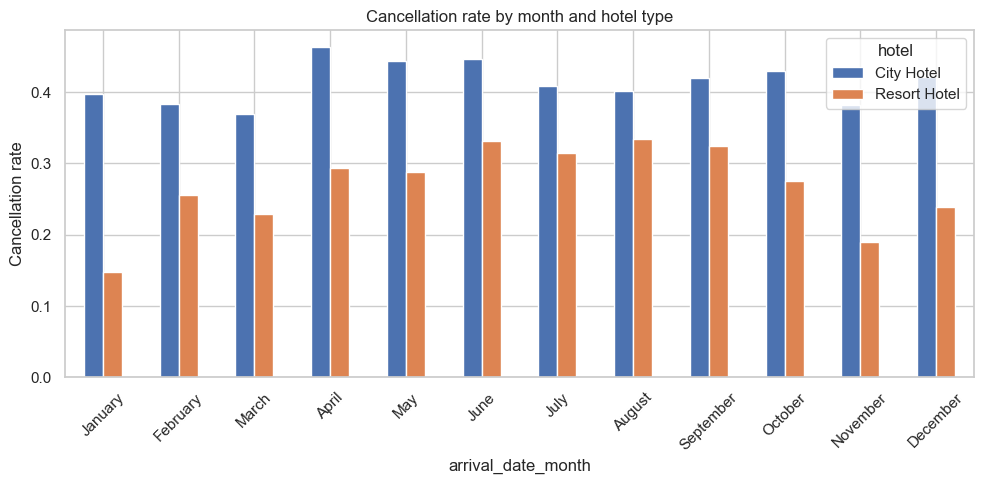

In [18]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

cancel_by_month_hotel = (
    df.groupby(["arrival_date_month", "hotel"])["is_canceled_flag"]
      .mean()
      .unstack()
      .reindex(month_order)
)

display(cancel_by_month_hotel.applymap(lambda x: f"{x:.2%}"))

cancel_by_month_hotel.plot(kind="bar")
plt.ylabel("Cancellation rate")
plt.title("Cancellation rate by month and hotel type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\adhee\AppData\Local\Temp\ipykernel_20260\3620713435.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("lead_bucket")["is_canceled_flag"]


,lead_bucket,cancel_rate
0,0-7d,0.096323
1,8-30d,0.278639
2,31-90d,0.376984
3,91-180d,0.447105
4,181-365d,0.554540
5,366+d,0.676620


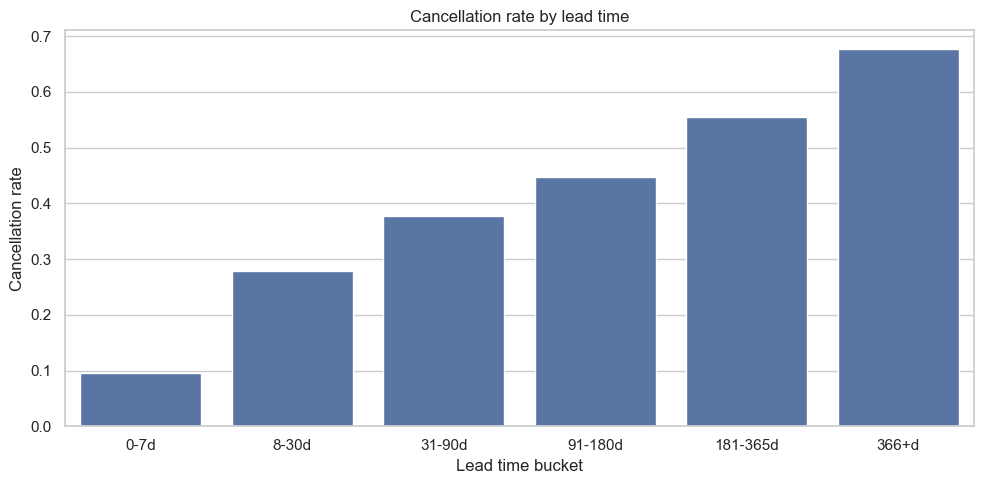

In [19]:
lead_bins = [0, 7, 30, 90, 180, 365, 800]
lead_labels = ["0-7d", "8-30d", "31-90d", "91-180d", "181-365d", "366+d"]

df["lead_bucket"] = pd.cut(df["lead_time"], bins=lead_bins, labels=lead_labels, include_lowest=True)

lead_cancel = (
    df.groupby("lead_bucket")["is_canceled_flag"]
      .mean()
      .reset_index(name="cancel_rate")
)

display(lead_cancel)

plt.figure()
sns.barplot(data=lead_cancel, x="lead_bucket", y="cancel_rate")
plt.ylabel("Cancellation rate")
plt.xlabel("Lead time bucket")
plt.title("Cancellation rate by lead time")
plt.tight_layout()
plt.show()


In [20]:
corr_cols = [
    "is_canceled_flag", "lead_time", "total_nights", "adr",
    "total_of_special_requests", "required_car_parking_spaces"
]

corr = df[corr_cols].corr()["is_canceled_flag"].sort_values(ascending=False)
corr


is_canceled_flag               1.000000
lead_time                      0.293123
adr                            0.047557
total_nights                   0.017779
required_car_parking_spaces   -0.195498
total_of_special_requests     -0.234658
Name: is_canceled_flag, dtype: float64

In [21]:
cancel_by_deposit = (
    df.groupby("deposit_type")["is_canceled_flag"]
      .mean()
      .reset_index(name="cancel_rate")
)

cancel_by_segment = (
    df.groupby("market_segment")["is_canceled_flag"]
      .mean()
      .reset_index(name="cancel_rate")
      .sort_values("cancel_rate", ascending=False)
)

cancel_by_repeat = (
    df.groupby("is_repeated_guest")["is_canceled_flag"]
      .mean()
      .reset_index(name="cancel_rate")
)

display(cancel_by_deposit)
display(cancel_by_segment)
display(cancel_by_repeat)


,deposit_type,cancel_rate
0,No Deposit,0.283770
1,Non Refund,0.993624
2,Refundable,0.222222


,market_segment,cancel_rate
7,Undefined,1.000000
4,Groups,0.610620
6,Online TA,0.367211
5,Offline TA/TO,0.343160
0,Aviation,0.219409
2,Corporate,0.187347
3,Direct,0.153419
1,Complementary,0.130552


,is_repeated_guest,cancel_rate
0,0,0.377851
1,1,0.144882


**Insights (Cancellations & Risk Factors)**  

- Overall cancellation rate is high, and city hotels tend to have a higher cancellation rate than resort hotels.  
- Cancellation risk increases sharply with longer lead times: last-minute bookings are much less likely to cancel than bookings made months in advance.  
- Numeric correlations show that lead time is positively associated with cancellations, while special requests and parking spaces are negatively associated (more committed guests cancel less).  
- Certain segments and deposit types exhibit higher cancellation rates, providing levers for policy changes and targeted overbooking strategies.


## 7. Pricing & Revenue Patterns

**Business Question 8:** How does ADR vary by hotel type and season? Are there underpriced or overpriced segments?

**Business Question 9:** Do special requests and parking correlate with higher ADR or reduced cancellations?


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,105.304465,43.602954,0.00,79.2,99.9,126.0,5400.0
Resort Hotel,40060.0,94.952930,61.442418,-6.38,50.0,75.0,125.0,508.0


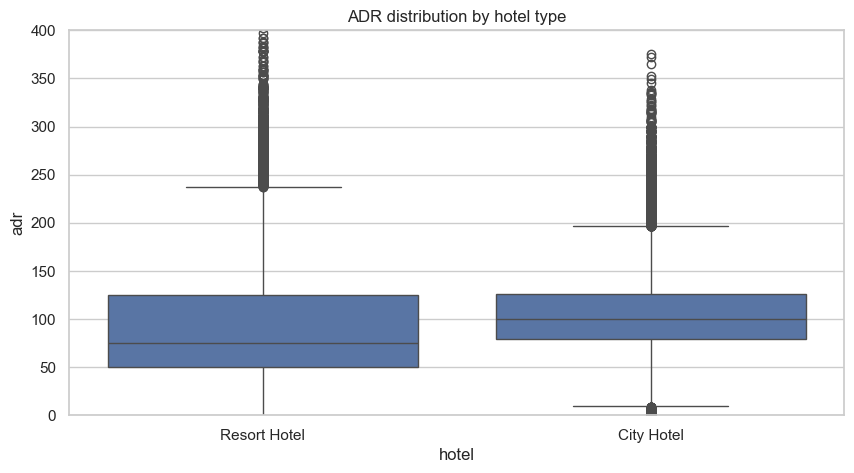

In [22]:
adr_by_hotel = df.groupby("hotel")["adr"].describe()
display(adr_by_hotel)

plt.figure()
sns.boxplot(data=df, x="hotel", y="adr")
plt.ylim(0, 400)
plt.title("ADR distribution by hotel type")
plt.show()


hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,82.628986,49.461883
February,85.088278,55.171930
March,92.643116,57.520147
April,111.251838,77.849496
May,121.638560,78.758134
June,119.074341,110.444749
July,110.734292,155.181299
August,114.680455,186.790574
September,110.004661,93.252030


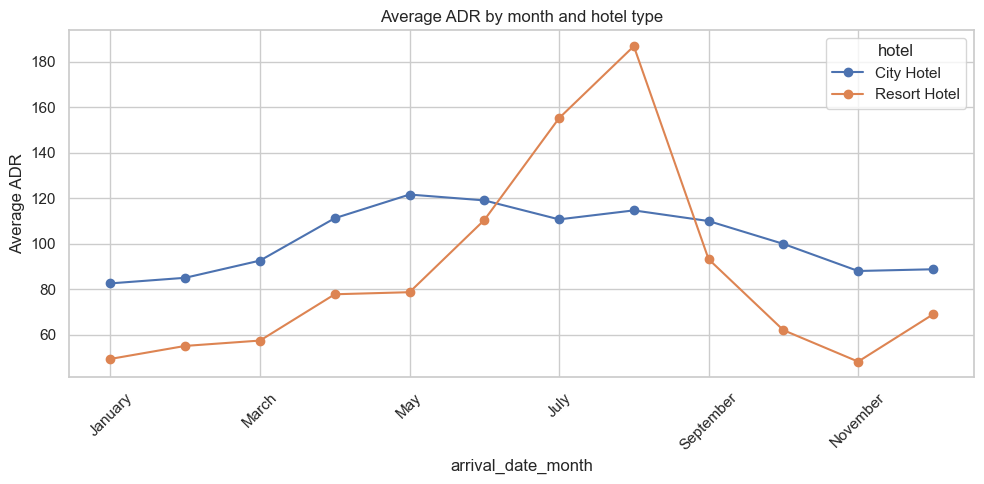

In [23]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

adr_month = (
    df.groupby(["arrival_date_month", "hotel"])["adr"]
      .mean()
      .unstack()
      .reindex(month_order)
)

display(adr_month)

adr_month.plot(kind="line", marker="o")
plt.ylabel("Average ADR")
plt.title("Average ADR by month and hotel type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,total_of_special_requests,bookings,cancel_rate,avg_adr
0,0,70318,0.477204,94.961611
1,1,33226,0.220249,108.455824
2,2,12969,0.220989,117.033451
3,3,2497,0.178614,123.846131
4,4,340,0.105882,130.568706
5,5,40,0.050000,127.746500


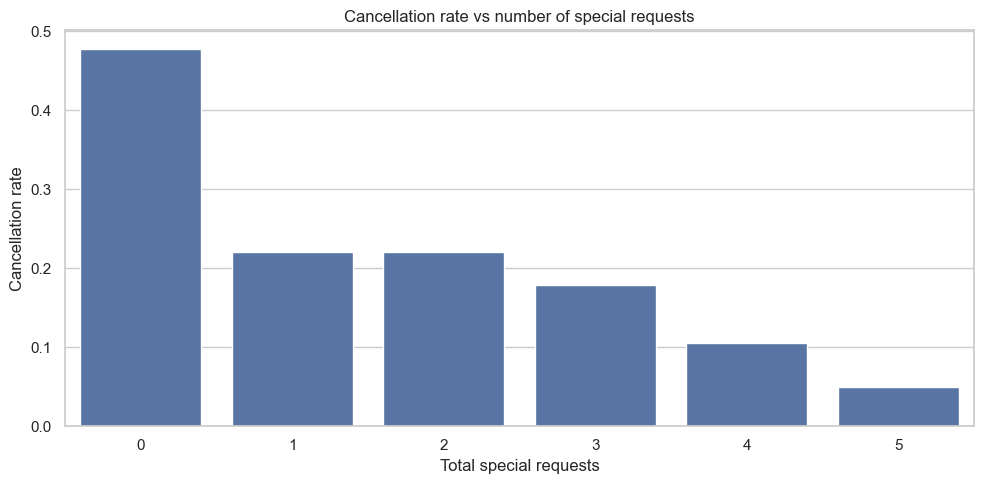

,required_car_parking_spaces,bookings,cancel_rate
0,0,111974,0.394949
1,1,7383,0.000000
2,2,28,0.000000
3,3,3,0.000000
4,8,2,0.000000


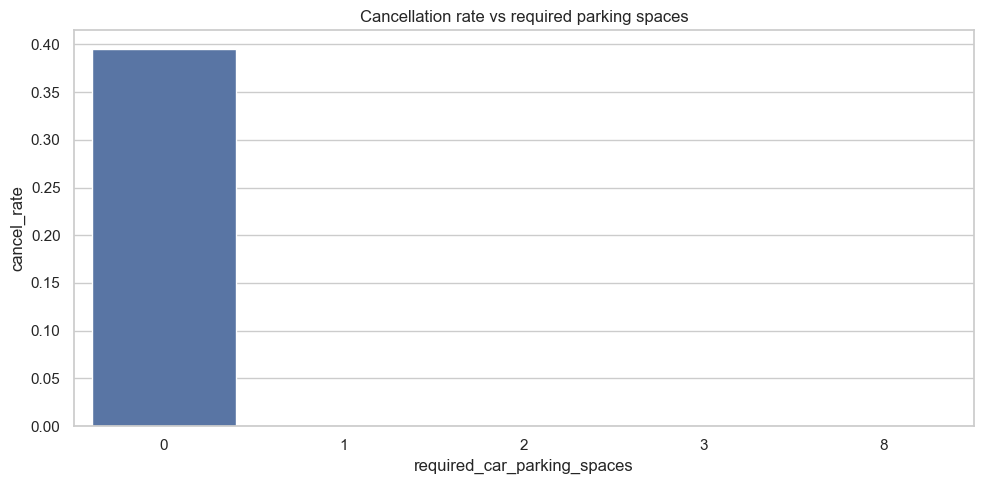

In [24]:
requests_group = (
    df.groupby("total_of_special_requests")
      .agg(
          bookings=("hotel", "size"),
          cancel_rate=("is_canceled_flag", "mean"),
          avg_adr=("adr", "mean")
      )
      .reset_index()
)

display(requests_group)

plt.figure()
sns.barplot(data=requests_group, x="total_of_special_requests", y="cancel_rate")
plt.title("Cancellation rate vs number of special requests")
plt.ylabel("Cancellation rate")
plt.xlabel("Total special requests")
plt.tight_layout()
plt.show()

parking_group = (
    df.groupby("required_car_parking_spaces")
      .agg(
          bookings=("hotel", "size"),
          cancel_rate=("is_canceled_flag", "mean")
      )
      .reset_index()
)

display(parking_group)

plt.figure()
sns.barplot(data=parking_group, x="required_car_parking_spaces", y="cancel_rate")
plt.title("Cancellation rate vs required parking spaces")
plt.tight_layout()
plt.show()


**Insights (Pricing & Commitment Signals)**  

- City hotels show slightly higher average ADR, but resort ADR varies more strongly with seasonality.  
- ADR is highest during peak months, aligning with higher demand and typical revenue-management strategies.  
- Guests with more special requests tend to pay higher ADR on average and cancel less frequently.  
- Bookings with required parking spaces have very low cancellation rates, making them strong indicators of high commitment.


## 8. Guest Loyalty & Room Assignment

**Business Question 10:** Are repeated guests different from first-time guests in terms of behavior and value?

**Business Question 11:** Are mismatches between reserved and assigned room types harmful, or do they often reflect upgrades?


In [25]:
repeat_stats = (
    df.groupby("is_repeated_guest")
      .agg(
          bookings=("hotel", "size"),
          avg_adr=("adr", "mean"),
          cancel_rate=("is_canceled_flag", "mean"),
          avg_prev_cancellations=("previous_cancellations", "mean"),
          avg_prev_not_cancel=("previous_bookings_not_canceled", "mean")
      )
      .reset_index()
)

repeat_stats


,is_repeated_guest,bookings,avg_adr,cancel_rate,avg_prev_cancellations,avg_prev_not_cancel
0,0,115580,103.063492,0.377851,0.074503,0.023438
1,1,3810,64.445997,0.144882,0.469816,3.585039


In [26]:
df["room_mismatch"] = df["reserved_room_type"] != df["assigned_room_type"]

mismatch_rate = df["room_mismatch"].mean()
cancel_by_mismatch = (
    df.groupby("room_mismatch")["is_canceled_flag"]
      .mean()
      .reset_index(name="cancel_rate")
)

mismatch_rate, cancel_by_mismatch


(0.12494346260155792,
    room_mismatch  cancel_rate
 0          False     0.415629
 1           True     0.053764)

**Insights (Loyalty & Room Assignment)**  

- Repeated guests represent a smaller share of bookings but have lower cancellation rates and more previous successful stays, indicating higher lifetime value and reliability.  
- A noticeable fraction of bookings has a mismatch between reserved and assigned room types. These bookings tend to show lower cancellation rates, suggesting that many mismatches are upgrades or neutral changes, not service failures.


## 9. Key Takeaways & Next Steps

**Demand & Seasonality**  
- Demand concentrates in summer months, especially for resort hotels, while winter periods are under-utilized.  

**Segments & Channels**  
- Online travel agencies dominate volume but drive higher cancellation risk, while direct and corporate channels offer more stable, lower-risk business.  

**Cancellation Management**  
- Long lead times, specific segments, and some deposit types are key risk factors. Using these features, the hotel can design tiered cancellation policies and smarter overbooking strategies.  

**Pricing & Revenue Optimization**  
- ADR varies strongly by hotel type, season, and stay type. Commitment signals such as special requests and parking can be used to identify high-value guests for upsell and loyalty efforts.  

**Loyalty & Experience**  
- Repeated guests are demonstrably more reliable and valuable, justifying investment in loyalty programs and personalized experiences.

This EDA provides a foundation for further work such as cancellation prediction models, demand forecasting, or price optimization using the same dataset.


In [28]:
df["is_canceled_flag"].mean()


0.37041628277075134

In [29]:
df.groupby("hotel")["is_canceled_flag"].mean()


hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled_flag, dtype: float64

In [30]:
bookings_by_month


,arrival_date_month,bookings
0,January,5929
1,February,8068
2,March,9794
3,April,11089
4,May,11791
5,June,10939
6,July,12661
7,August,13877
8,September,10508
9,October,11160


In [31]:
seg


,market_segment,bookings,avg_adr,total_revenue
0,Online TA,56477,117.197063,23942047.53
1,Offline TA/TO,24219,87.354783,8151912.73
2,Groups,19811,79.479472,4669636.74
3,Direct,12606,115.445175,5093028.39
4,Corporate,5295,69.358952,774295.26
5,Complementary,743,2.886366,5082.52
6,Aviation,237,100.142110,87446.36
7,Undefined,2,15.000000,48.00


In [32]:
chan


,distribution_channel,bookings,avg_adr,cancel_rate
0,TA/TO,97870,103.292866,0.410259
1,Direct,14645,106.654983,0.174599
2,Corporate,6677,69.325204,0.220758
3,GDS,193,120.554301,0.191710
4,Undefined,5,46.240000,0.800000


In [33]:
df.groupby("stay_type").agg(
    avg_nights=("total_nights","mean"),
    avg_adr=("adr","mean"),
    cancel_rate=("is_canceled_flag","mean")
)


,avg_nights,avg_adr,cancel_rate
stay_type,,,
Couple,3.565709,101.641222,0.393867
Family,3.935276,154.434700,0.349228
Solo,2.691172,80.988385,0.289142


In [34]:
lead_cancel


,lead_bucket,cancel_rate
0,0-7d,0.096323
1,8-30d,0.278639
2,31-90d,0.376984
3,91-180d,0.447105
4,181-365d,0.554540
5,366+d,0.676620


In [35]:
cancel_by_deposit

,deposit_type,cancel_rate
0,No Deposit,0.283770
1,Non Refund,0.993624
2,Refundable,0.222222


In [36]:
cancel_by_segment

,market_segment,cancel_rate
7,Undefined,1.000000
4,Groups,0.610620
6,Online TA,0.367211
5,Offline TA/TO,0.343160
0,Aviation,0.219409
2,Corporate,0.187347
3,Direct,0.153419
1,Complementary,0.130552


In [37]:
cancel_by_repeat

,is_repeated_guest,cancel_rate
0,0,0.377851
1,1,0.144882


In [38]:
adr_month


hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,82.628986,49.461883
February,85.088278,55.171930
March,92.643116,57.520147
April,111.251838,77.849496
May,121.638560,78.758134
June,119.074341,110.444749
July,110.734292,155.181299
August,114.680455,186.790574
September,110.004661,93.252030


In [39]:
requests_group

,total_of_special_requests,bookings,cancel_rate,avg_adr
0,0,70318,0.477204,94.961611
1,1,33226,0.220249,108.455824
2,2,12969,0.220989,117.033451
3,3,2497,0.178614,123.846131
4,4,340,0.105882,130.568706
5,5,40,0.050000,127.746500


In [40]:
parking_group

,required_car_parking_spaces,bookings,cancel_rate
0,0,111974,0.394949
1,1,7383,0.000000
2,2,28,0.000000
3,3,3,0.000000
4,8,2,0.000000


In [41]:
repeat_stats

,is_repeated_guest,bookings,avg_adr,cancel_rate,avg_prev_cancellations,avg_prev_not_cancel
0,0,115580,103.063492,0.377851,0.074503,0.023438
1,1,3810,64.445997,0.144882,0.469816,3.585039


In [42]:
cancel_by_mismatch

,room_mismatch,cancel_rate
0,False,0.415629
1,True,0.053764
